# Initilize

In [45]:
import numpy as np
import pandas as pd 

# Data pre-processing

In [46]:
df = pd.read_csv('forestfires.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [48]:
for column in df.columns:
    print(column)
    print('NaN: ', df[column].isna().sum())
    print('Null: ', df[column].isnull().sum())
    print('Dtype: ', df[column].dtypes)
    print('-'*20)

X
NaN:  0
Null:  0
Dtype:  int64
--------------------
Y
NaN:  0
Null:  0
Dtype:  int64
--------------------
month
NaN:  0
Null:  0
Dtype:  object
--------------------
day
NaN:  0
Null:  0
Dtype:  object
--------------------
FFMC
NaN:  0
Null:  0
Dtype:  float64
--------------------
DMC
NaN:  0
Null:  0
Dtype:  float64
--------------------
DC
NaN:  0
Null:  0
Dtype:  float64
--------------------
ISI
NaN:  0
Null:  0
Dtype:  float64
--------------------
temp
NaN:  0
Null:  0
Dtype:  float64
--------------------
RH
NaN:  0
Null:  0
Dtype:  int64
--------------------
wind
NaN:  0
Null:  0
Dtype:  float64
--------------------
rain
NaN:  0
Null:  0
Dtype:  float64
--------------------
area
NaN:  0
Null:  0
Dtype:  float64
--------------------


In [49]:
df['day'].unique()
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [50]:
def convert_day(day: str) -> int:
    # covert string to interger
    day_dict = {
        'mon': 2,
        'tue': 3,
        'wed': 4,
        'thu': 5,
        'fri': 6,
        'sat': 7,
        'sun': 8
    }
    return day_dict[day]

def convert_month(month: str) -> int:
    # covert string to interger
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict[month]

In [51]:
df['month'] = df['month'].apply(convert_month)
df['day'] = df['day'].apply(convert_day)

In [52]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,8,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# Model

In [53]:
class LinearRegression:
    def rmse(self, Y: np.ndarray , Y_pred: np.ndarray ) -> float:
        #calculate root-mean-square error
        delta = Y - Y_pred

        return (delta**2).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # optimize weights 
        inv_cov = np.linalg.inv(X.T @ X)
        self.thelta = inv_cov @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # predict the area (output)
        y = self.thelta.T @ X.T

        return y

In [54]:
X_Y = df.to_numpy()

In [55]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [56]:
X_Y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]])

In [57]:
X_Y_test

array([[  7.  ,   5.  ,   8.  , ...,   3.6 ,   0.  ,   0.  ],
       [  5.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  8.  ,   6.  ,   8.  , ...,   4.9 ,   0.  , 746.28],
       ...,
       [  7.  ,   4.  ,   8.  , ...,   6.7 ,   0.  ,  11.16],
       [  1.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  6.  ,   3.  ,  11.  , ...,   4.5 ,   0.  ,   0.  ]])

In [58]:
lr = LinearRegression()

In [59]:
X_train = X_Y_train[:,:12]
Y_train = X_Y_train[:,12:]

X_test = X_Y_test[:, :12]
Y_test = X_Y_test[:, 12:]

In [60]:
lr.fit(X_train, Y_train)

In [61]:
Y_predicted = lr.predict(X_test)

In [62]:
Y_predicted

array([[ 33.59102041,  27.34017299,  26.83638958,  17.47930084,
          3.67125484,  26.20233237,  26.60012038,  25.31952987,
         18.32030495,  40.2768549 ,   9.92501608,  34.88131479,
         21.1837366 ,  25.91157362,  18.63857625,  18.35312283,
         26.07707169,  32.70005628,  21.13849988,  22.95029306,
         18.98276194,  25.9939789 ,  14.97722563,  23.47441706,
         20.60634589,  22.12265066,   8.58769564,  27.59268934,
         24.61690574,  -1.60966828,  -6.48524113,  23.80417863,
         11.80119756,  21.25312297,  -3.44310848,  16.92877287,
         24.56622202,  10.17651632,  -1.88491102,  15.59290822,
         23.08041842,  20.2597266 ,  -0.4029118 ,  18.32875732,
         14.02228967,  24.05787507,  23.70541129,  17.90544586,
         24.05787507,  21.17389256, -11.13503844,  -9.23476326,
         -1.30597277,  -3.86984769,  -1.8907285 ,   5.9642239 ,
         10.1992655 ,  11.31715994,  12.81743683,   6.70255799,
         17.89651389,  15.27383857,   4.

In [63]:
lr.rmse(Y_test, Y_predicted)

81.04405295404756

In [64]:
#df.to_csv('pre-processed_data.csv', index= False)

In [65]:
import matplotlib.pyplot as plt


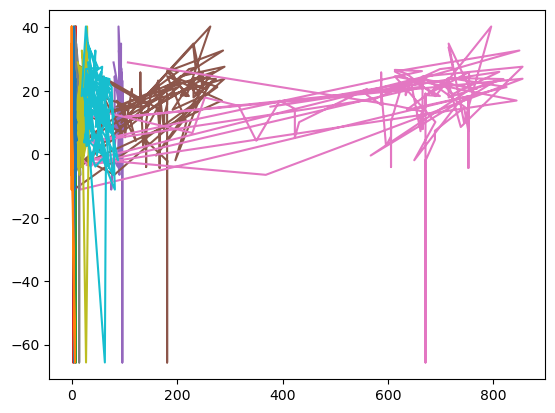

In [66]:
plt.plot(X_test, Y_predicted.T)